<a href="https://colab.research.google.com/github/padmachocka/ITC-Projects/blob/main/Housing_Dataset_Linear_KNN_HOA_Prediction_Using_Bins_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Home-Owners Association Fees Using House data

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/raw_house_data.xlsx')
print(df.shape)

(5000, 16)


In [ ]:
df.describe()


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000,4975.000000,4438.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143,1.885226,103.043058
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946,1.136578,547.397960
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000,0.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000,1.000000,8.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000,2.000000,56.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000,3.000000,135.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000,9.000000,20000.000000


In [ ]:
df.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory

In [ ]:
print(df.columns)

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')


In [ ]:
df = df.rename(columns = {'sold_price': 'Sold_Price', 'zipcode': 'Zipcode', 'longitude':'Longitude', 'latitude': 'Latitude', 'lot_acres': 'Lot_Acres',
       'taxes': 'Taxes', 'year_built': 'Year_Built', 'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'sqrt_ft':'Sqft', 'garage': 'Garage',
       'kitchen_features': 'Kitchen_Features', 'fireplaces': 'Fireplaces', 'floor_covering': 'Floor_Covering'})

In [ ]:
missing = df.isnull().sum()

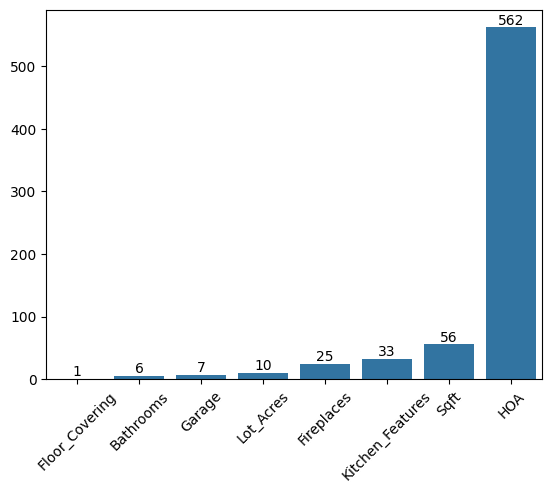

In [ ]:
missing = missing[missing>0]
missing.sort_values(inplace = True)
missing.plot.bar()

missing_bars = sns.barplot(missing, estimator="sum", errorbar=None)
missing_bars.bar_label(missing_bars.containers[0], fontsize=10);
plt.xticks(rotation=45)
plt.show()

In [ ]:
from datetime import datetime

current_year = datetime.now().year

# Calculate age
df['Age'] = current_year - df['Year_Built']

df.head()

,MLS,Sold_Price,Zipcode,Longitude,Latitude,Lot_Acres,Taxes,Year_Built,Bedrooms,Bathrooms,Sqft,Garage,Kitchen_Features,Fireplaces,Floor_Covering,HOA,Age
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,84
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,28
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN,28
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN,95
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,30


In [ ]:
df1 = df.drop(['Kitchen_Features', 'Floor_Covering'], axis = 1)

<Axes: >

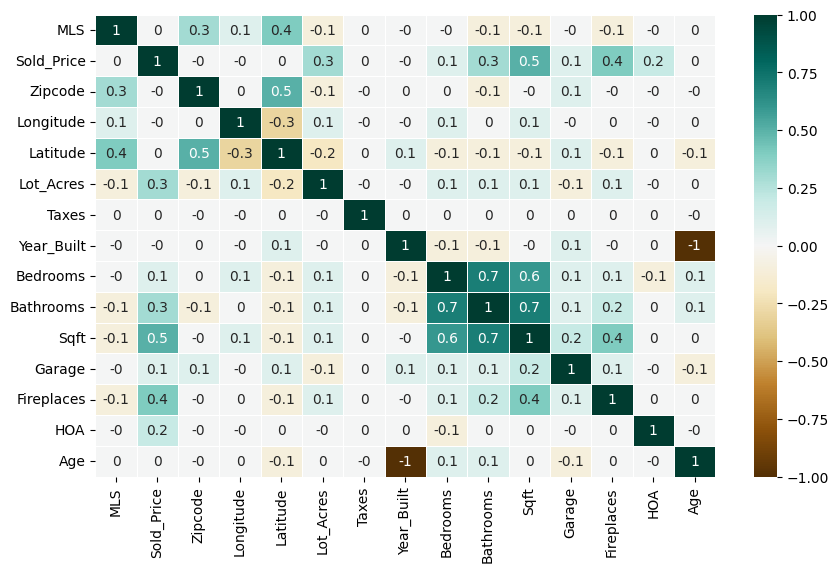

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(round(df1.corr(),1), cmap="BrBG", annot =True, linewidths= 0.5)

In [ ]:
# features = ['Sold_Price', 'Zipcode', 'Longitude', 'Latitude', 'Lot_Acres', 'Taxes', 'Year_Built', 'Sqft', 'Garage', 'Fireplaces','HOA', 'Age']

# fig, axes = plt.subplots(len(features), 2, figsize=(10, 5 * len(features)))

# for i, feature in enumerate(features):
#     # Original distribution
#     sns.boxplot(data=df[feature], showfliers=True, ax=axes[i, 0])
#     axes[i, 0].set_title(f"Original Distribution of {feature}")
#     axes[i, 0].set_ylabel(feature)

#     # Distribution without outliers
#     sns.boxplot(data=df[feature], showfliers=False, ax=axes[i, 1])
#     axes[i, 1].set_title(f"Distribution without Outliers of {feature}")
#     axes[i, 1].set_ylabel(feature)

# plt.tight_layout()
# plt.show()

In [ ]:
df['HOA'] = df['HOA'].fillna(0)
df['HOA'].isnull().sum()

0

In [ ]:
df.dropna(subset = ['Sqft'], inplace = True)
df.shape

(4944, 17)

In [ ]:
df['Kitchen_Features'] = df['Kitchen_Features'].fillna('Others')
df['Garage'] = df['Garage'].fillna(0)
df.isnull().sum()

,0
MLS,0
Sold_Price,0
Zipcode,0
Longitude,0
Latitude,0
Lot_Acres,0
Taxes,0
Year_Built,0
Bedrooms,0
Bathrooms,0


In [ ]:
df['Rooms'] = df[['Bedrooms', 'Bathrooms']].sum(axis = 1)
df.drop(['Bedrooms', 'Bathrooms'], inplace = True, axis = 1)
df['Price/Sqft'] = round(df['Sold_Price']. div(df['Sqft'].values), 2)
df['Price/Sqft_bins'] = pd.qcut(df['Price/Sqft'], q = 20, labels=False)
df['HOA_bins'] = df['HOA'].apply(lambda x: 0 if x == 0 else 1)
print(df.columns)
print(df.shape)

Index(['MLS', 'Sold_Price', 'Zipcode', 'Longitude', 'Latitude', 'Lot_Acres',
       'Taxes', 'Year_Built', 'Sqft', 'Garage', 'Kitchen_Features',
       'Fireplaces', 'Floor_Covering', 'HOA', 'Age', 'Rooms', 'Price/Sqft',
       'Price/Sqft_bins', 'HOA_bins'],
      dtype='object')
(4944, 19)


In [ ]:
df['Kitchen_Features_Count']=df['Kitchen_Features'].apply(lambda x: len(x.split(',')) if x else 0)
df['Floor_Covering_Count'] = df['Floor_Covering'].apply(lambda x: len(x.split(',')) if x else 0) # 'if x else 0' if x is not empty it will count else if x is empty it will return 0


In [ ]:
data = df.drop(['Kitchen_Features', 'Floor_Covering'], axis = 1)
data.head()

,MLS,Sold_Price,Zipcode,Longitude,Latitude,Lot_Acres,Taxes,Year_Built,Sqft,Garage,Fireplaces,HOA,Age,Rooms,Price/Sqft,Price/Sqft_bins,HOA_bins,Kitchen_Features_Count,Floor_Covering_Count
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500.0,0.0,6.0,0.0,84,23.0,504.76,19,0,4,2
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300.0,0.0,5.0,0.0,28,4.0,575.34,19,0,2,2
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,9019.0,4.0,4.0,0.0,95,12.0,498.95,19,0,4,3
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,6396.0,3.0,5.0,55.0,30,10.0,533.37,19,1,5,2
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,6842.0,3.0,5.0,422.0,26,7.0,475.01,19,1,5,3


In [ ]:
data.tail()

,MLS,Sold_Price,Zipcode,Longitude,Latitude,Lot_Acres,Taxes,Year_Built,Sqft,Garage,Fireplaces,HOA,Age,Rooms,Price/Sqft,Price/Sqft_bins,HOA_bins,Kitchen_Features_Count,Floor_Covering_Count
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,3601.0,3.0,1.0,0.0,20,8.0,137.46,0,0,9,2
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,2318.0,3.0,1.0,43.0,35,7.0,237.27,15,1,10,2
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,1772.0,0.0,0.0,0.0,56,5.0,268.06,17,0,6,1
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,3724.0,3.0,1.0,0.0,16,8.0,147.69,1,0,9,2
4999,4111490,450000.0,85621,-110.913054,31.385259,4.16,2814.48,1988,4317.0,0.0,3.0,0.0,37,8.0,104.24,0,0,5,2


<Axes: >

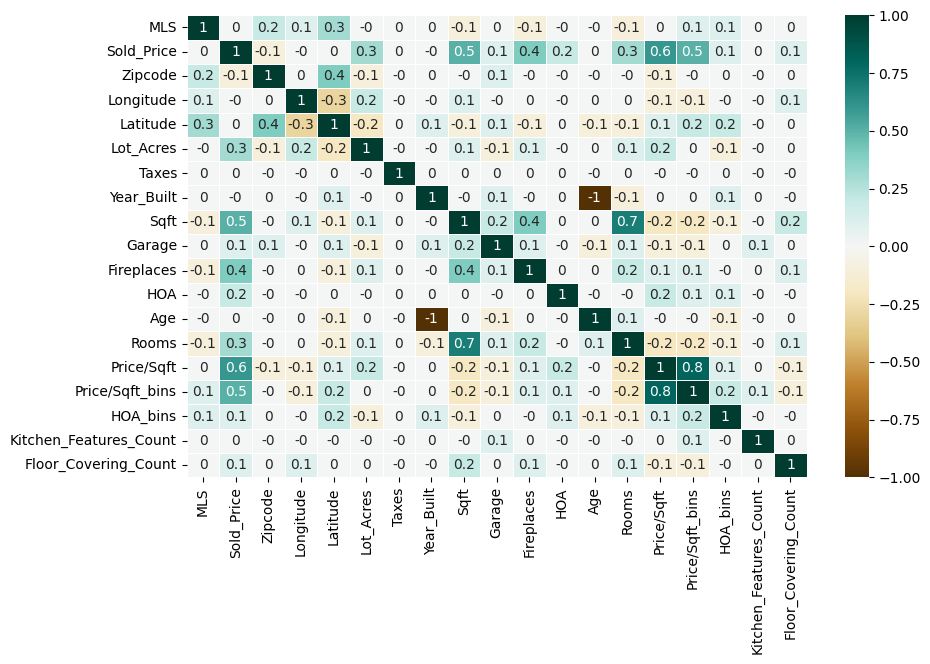

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(round(data.corr(),1), cmap="BrBG", annot =True, linewidths= 0.5)

<ipython-input-188-70afaefd29e4>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


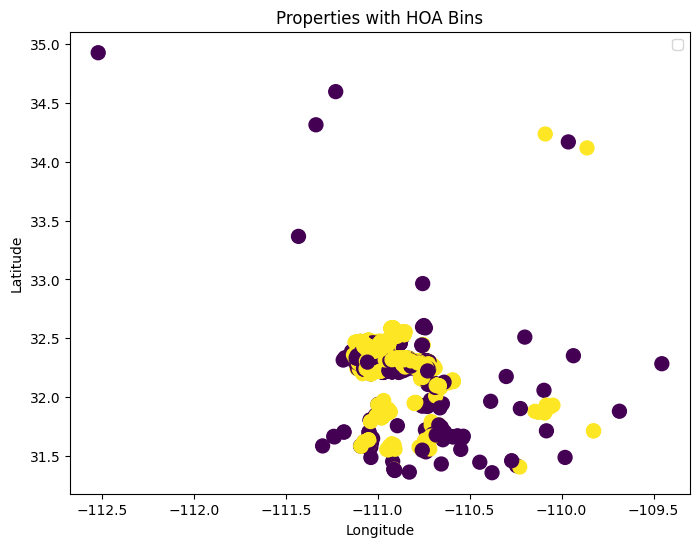

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(8, 6))
cmap = cm.viridis
plt.scatter(df['Longitude'], df['Latitude'], c=df['HOA_bins'], s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Properties with HOA Bins')
plt.show()

In [ ]:
data_Classifier = data[['HOA_bins', 'Latitude', 'Longitude']]

In [ ]:
train_ratio = 0.9

train_data_classifier = data_Classifier.sample(frac=train_ratio, random_state=42)
test_data_classifier = data_Classifier.drop(train_data_classifier.index)

print(train_data_classifier.shape)
print(test_data_classifier.shape)
test_data_classifier


y_train = train_data_classifier['HOA_bins']
X_train = train_data_classifier.drop(['HOA_bins'], axis = 1)
y_test = test_data_classifier['HOA_bins']
X_test = test_data_classifier.drop(['HOA_bins'], axis = 1)


print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)


# converting X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(4450, 3)
(494, 3)
(4450,)
(4450, 2)
(494,)
(494, 2)


# KNN Classifier

In [ ]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X - X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()
    return y_hat

## Prediction using KNN Classifier



In [ ]:
knn_instance = KNNClassifier()
knn_instance.fit(X_train,y_train)
y_hat_Classes_train = knn_instance.predict(X_train, K = 5, epsilon = 1e-3)
y_hat_Classes_train

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y == y_hat)

In [ ]:
round(accuracy(y_train,y_hat_Classes_train), 2)

0.91

In [ ]:
y_hat_Classes_test = knn_instance.predict(X_test, K = 5, epsilon = 1e-3)

In [ ]:
accuracy(y_test,y_hat_Classes_test)

0.8846153846153846

Text(0.5, 47.7222222222222, 'Predicted label')

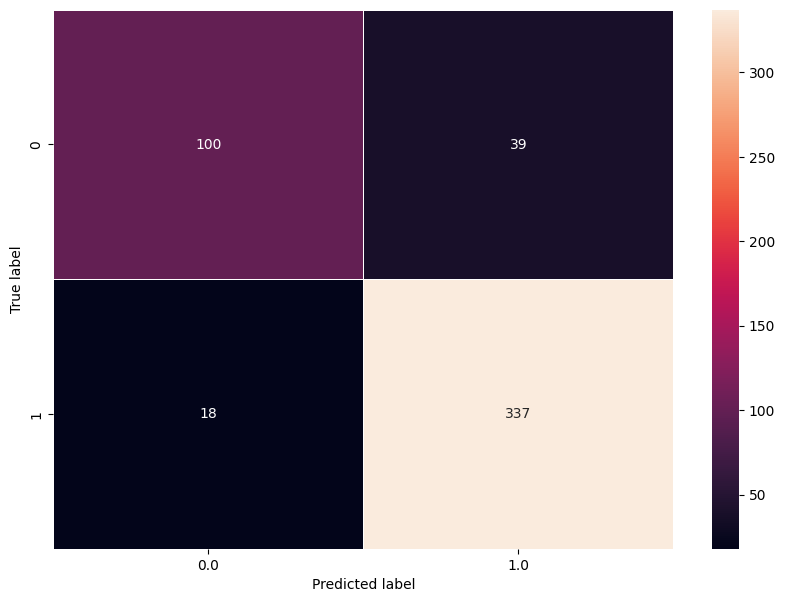

In [ ]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_Classes_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths= .5)
plt.ylabel('True label')
plt.xlabel('Predicted label')

 Creating a new dataset by combining the output of knn classifier with original-cleaned dataset

In [ ]:
data = data.drop(['MLS', 'Garage', 'Fireplaces', 'Year_Built', 'Price/Sqft', 'Kitchen_Features_Count', 'Floor_Covering_Count', 'Zipcode'], axis = 1)
print(data.shape)

(4944, 11)


In [ ]:
data.columns

Index(['Sold_Price', 'Longitude', 'Latitude', 'Lot_Acres', 'Taxes', 'Sqft',
       'HOA', 'Age', 'Rooms', 'Price/Sqft_bins', 'HOA_bins'],
      dtype='object')

<Axes: >

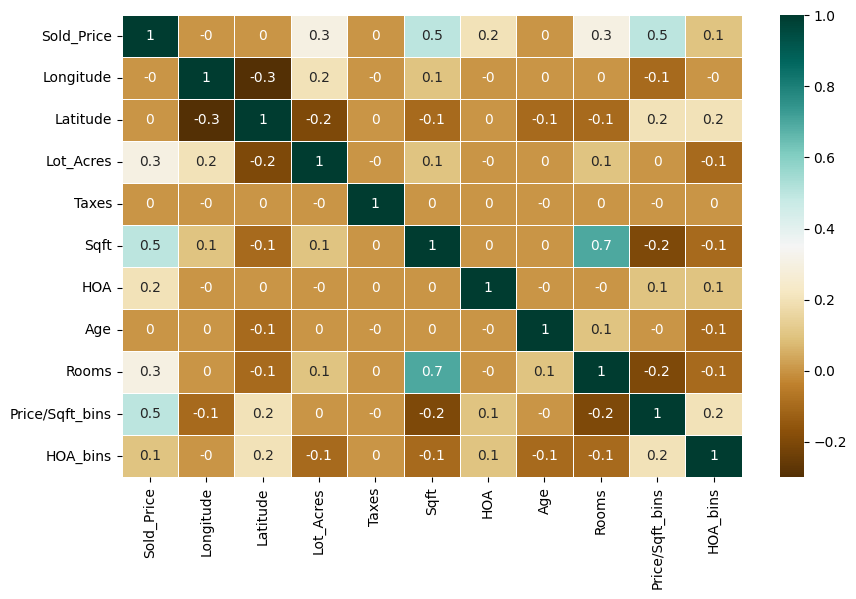

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(round(data.corr(),1), cmap="BrBG", annot =True, linewidths= 0.5)

In [ ]:
data_copy = data.copy()

In [ ]:
#MinMaxScaling
data_scaled = (data_copy - data_copy.min())/(data_copy.max()-data_copy.min())
data_scaled

,Sold_Price,Longitude,Latitude,Lot_Acres,Taxes,Sqft,HOA,Age,Rooms,Price/Sqft_bins,HOA_bins
0,1.000000,0.698727,0.000000,1.000000,0.000432,0.441149,0.00000,0.038633,0.304348,1.000000,0.0
1,0.785617,0.481090,0.066597,0.792479,0.000853,0.290971,0.00000,0.010896,0.028986,1.000000,0.0
3,0.844085,0.484172,0.081062,0.295576,0.000689,0.371644,0.00000,0.044081,0.144928,1.000000,0.0
4,0.631933,0.556641,0.260057,0.001490,0.001260,0.248545,0.00275,0.011887,0.115942,1.000000,1.0
5,0.600468,0.525056,0.275157,0.000775,0.002276,0.269476,0.02110,0.009906,0.072464,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.063535,0.606205,0.154431,0.002312,0.000165,0.117374,0.00000,0.006934,0.086957,0.000000,0.0
4996,0.074255,0.542031,0.268796,0.000659,0.000395,0.057162,0.00215,0.014364,0.072464,0.789474,1.0
4997,0.059637,0.575672,0.450325,0.005599,0.000082,0.031537,0.00000,0.024765,0.043478,0.894737,0.0
4998,0.074255,0.477777,0.263336,0.000469,0.000477,0.123146,0.00000,0.004953,0.086957,0.052632,0.0


In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4944 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sold_Price       4944 non-null   float64
 1   Longitude        4944 non-null   float64
 2   Latitude         4944 non-null   float64
 3   Lot_Acres        4944 non-null   float64
 4   Taxes            4944 non-null   float64
 5   Sqft             4944 non-null   float64
 6   HOA              4944 non-null   float64
 7   Age              4944 non-null   float64
 8   Rooms            4944 non-null   float64
 9   Price/Sqft_bins  4944 non-null   float64
 10  HOA_bins         4944 non-null   float64
dtypes: float64(11)
memory usage: 592.5 KB


In [ ]:
train_ratio = 0.9

train_data = data_scaled.sample(frac=train_ratio, random_state=42)
test_data = data_scaled.drop(train_data.index)

print(train_data.shape)
print(test_data.shape)

y_train = train_data['HOA']
X_train = train_data.drop(['HOA'], axis = 1)

y_test = test_data['HOA']
X_test = test_data.drop(['HOA'], axis = 1)

print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

# converting X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(4450, 11)
(494, 11)
(4450,)
(4450, 10)
(494,)
(494, 10)


# KNN Regressor

In [ ]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/(np.exp(-dist2[idxt]).sum()+epsilon)
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

##Prediction using KNN Regressor

In [ ]:
X_train[:,0]

array([0.25940363, 0.15123758, 0.17072695, ..., 0.19099591, 0.07912688,
       0.11981098])

In [ ]:
knnr = KNNRegressor()
knnr.fit(X_train, y_train)

In [ ]:
y_hat_train = knnr.predict(X_train, 5, epsilon = 7e-3)

In [ ]:
y_hat_test = knnr.predict(X_test, 5, epsilon = 7e-3)

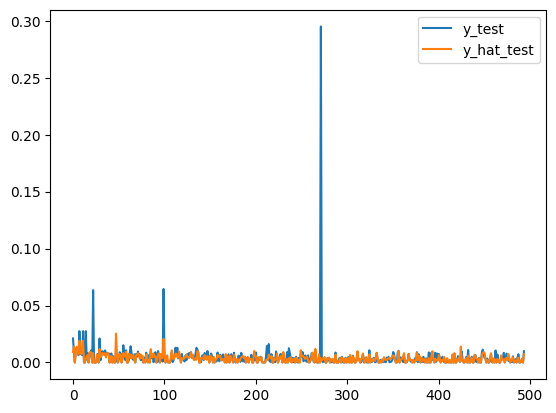

In [ ]:
plt.plot(y_test)
plt.plot(y_hat_test)
plt.legend(['y_test','y_hat_test'])

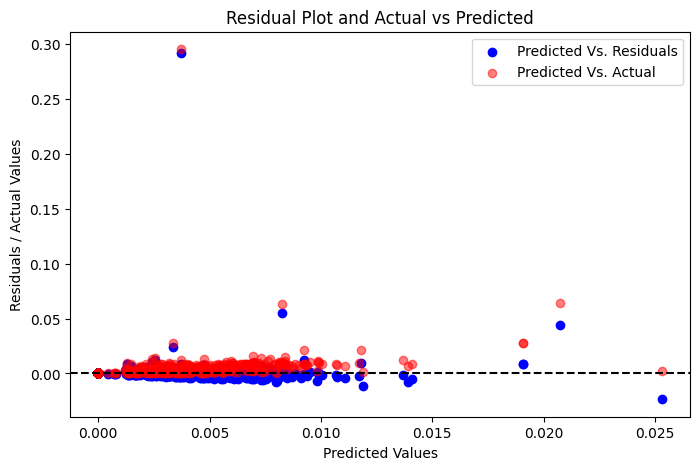

In [ ]:
plt.figure(figsize=(8,5))
residuals = y_test - y_hat_test
plt.scatter(y_hat_test, residuals, color='blue', label="Predicted Vs. Residuals")

plt.scatter(y_hat_test, y_test, color='red', alpha=0.5, label="Predicted Vs. Actual")


plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals / Actual Values")
plt.title("Residual Plot and Actual vs Predicted")
plt.legend()
plt.show()


In [ ]:
def MAE (Y, Y_hat):
  epsilon = 1e-10
  return np.sum(np.abs((Y-Y_hat)/(Y + epsilon)))

def R2(Y, Y_hat):
  N = len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS (Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [ ]:
mae = MAE(y_test, y_hat_test)

r2 = R2(y_test, y_hat_test)

print(f"MAE: {mae:.4f}")

print(f"R² Score: {r2:.4f}")

MAE: 606.5173
R² Score: -14.6040


# OLS Regressor

In [ ]:
class MVLinearRegression():
  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N, D = X.shape
    Y = y #Placeholder for future

    # Begin SGD Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta *(1/N) * (X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self,X):
    return X@self.W

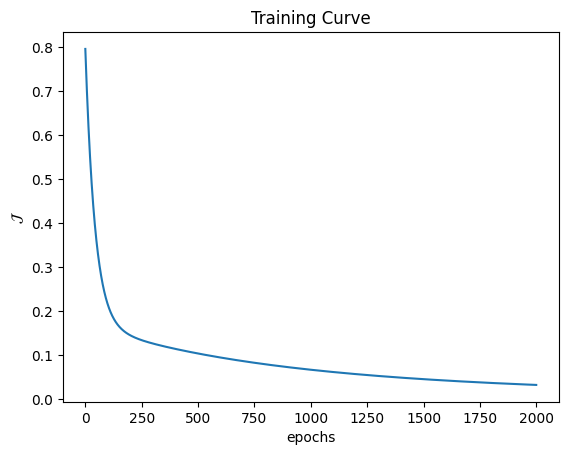

In [ ]:
#Fitting the OLS Model
my_reg = MVLinearRegression()
my_reg.fit(X_train,y_train, eta = 9e-3, epochs = 2e3, show_curve = True)

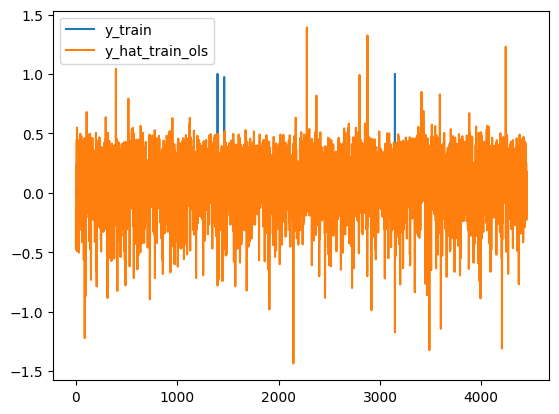

In [ ]:
#Predicting Train Dataset
y_hat_train_ols = my_reg.predict(X_train)
plt.plot(y_train)
plt.plot(y_hat_train_ols)
plt.legend(['y_train','y_hat_train_ols'])

In [ ]:
y_hat_test_ols = my_reg.predict(X_test)

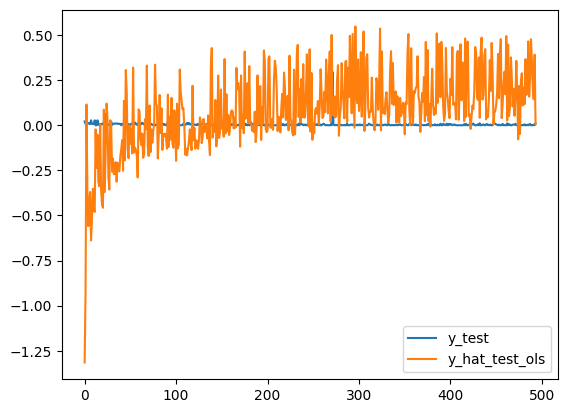

In [ ]:
plt.plot(y_test)
plt.plot(y_hat_test_ols)
plt.legend(['y_test','y_hat_test_ols'])

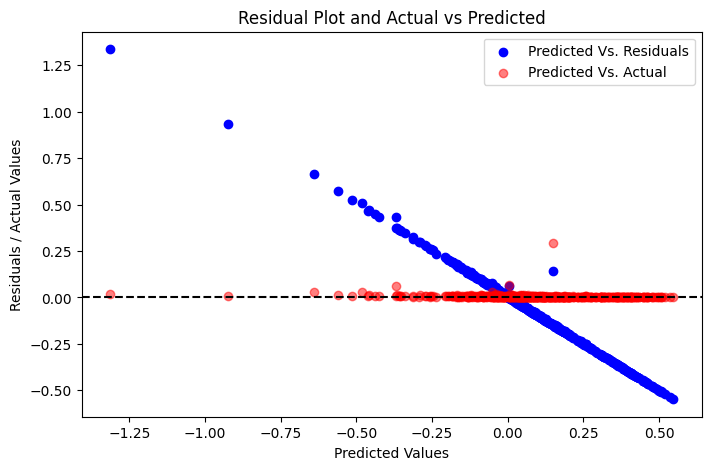

In [ ]:
plt.figure(figsize=(8,5))
residuals = y_test - y_hat_test_ols
plt.scatter(y_hat_test_ols, residuals, color='blue', label="Predicted Vs. Residuals")

plt.scatter(y_hat_test_ols, y_test, color='red', alpha=0.5, label="Predicted Vs. Actual")


plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals / Actual Values")
plt.title("Residual Plot and Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
mae_ols = MAE(y_test, y_hat_test_ols)
r2_ols = R2(y_test, y_hat_test_ols)



print(f"MAE: {mae_ols:.4f}")

print(f"R² Score: {r2_ols:.4f}")

MAE: 443835897026.8535
R² Score: -0.0253
